In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [23]:
# Data Cleaning (Part 1)
dataset = pd.read_csv("data/listing_processed.csv", header=0)

In [4]:
print(*data.columns)

id host_id host_since neighbourhood_cleansed zipcode property_type room_type accommodates bathrooms bedrooms beds price cleaning_fee guests_included extra_people minimum_nights availability_30 number_of_reviews cancellation_policy review_cat host_months property_cat


In [22]:
np.mean(data.price)

166.5263367599012

In [21]:
np.std(data.price)

435.79599385775043

In [95]:
cols = ["id", 
        "host_id",
        "zipcode",
        "host_since", 
        "neighbourhood_cleansed", 
        "property_type",
        "room_type",
        "accommodates",
        "bathrooms",
        "bedrooms",
        "beds",
        "bed_type",
        "price",
        "cleaning_fee",
        "guests_included",
        "extra_people",
        "minimum_nights",
        "availability_30",
        'number_of_reviews',
        'review_scores_rating',
        'cancellation_policy']

In [96]:
dataset = pd.read_csv("listings-2.csv", usecols=cols)

In [97]:
def printMisssingValue():
    for col in dataset.columns:
        print(col + ', Number of Missing Values:', len(dataset[col][dataset[col].isnull()]))

(array([1.3200e+02, 1.0000e+01, 1.0000e+02, 4.3000e+01, 1.3000e+01,
        4.7700e+02, 4.2000e+02, 2.2960e+03, 5.9590e+03, 2.9915e+04]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

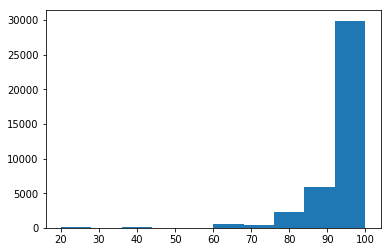

In [99]:
# Deal with missing values - review_scores_rating
review_score = dataset["review_scores_rating"][~np.isnan(dataset["review_scores_rating"])]
plt.hist(review_score)

In [98]:
#np.median(dataset["review_scores_rating"])

review_cat = []
for score in dataset["review_scores_rating"]:
  if np.isnan(score):
    review_cat.append("no-review")
  elif score < 60:
    review_cat.append("bad")
  elif score >= 60 and score < 93:
    review_cat.append("acceptable")
  else:
    review_cat.append("excellent")

dataset["review_cat"] = review_cat 

In [105]:
# Deal with missing values - cleaning_fee
values = {"cleaning_fee": 0}
dataset = dataset.fillna(value=values)

In [101]:
dataset

,id,host_id,host_since,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,number_of_reviews,review_scores_rating,cancellation_policy,review_cat
0,2060,2259,8/18/08,Washington Heights,10040,Other,Private room,2,NaN,1.0,...,$100.00,0,1,$0.00,1,30,1,80.0,flexible,acceptable
1,2595,2845,9/9/08,Midtown,10018,Apartment,Entire home/apt,2,1.0,0.0,...,$225.00,$95.00,1,$0.00,7,4,48,94.0,strict_14_with_grace_period,excellent
2,3831,4869,12/7/08,Clinton Hill,11238,Guest suite,Entire home/apt,3,1.0,1.0,...,$89.00,0,1,$0.00,1,6,313,90.0,moderate,acceptable
3,5099,7322,2/2/09,Murray Hill,10016,Apartment,Entire home/apt,2,1.0,1.0,...,$200.00,$125.00,2,$100.00,3,0,78,90.0,moderate,acceptable
4,5114,7345,2/2/09,Lower East Side,10002,Apartment,Private room,2,NaN,1.0,...,$94.00,0,1,$13.00,1,30,75,94.0,strict_14_with_grace_period,excellent
5,5121,7356,2/3/09,Bedford-Stuyvesant,11216,Apartment,Private room,2,NaN,1.0,...,$60.00,$0.00,1,$30.00,29,30,50,90.0,strict_14_with_grace_period,acceptable
6,5178,8967,3/3/09,Hell's Kitchen,10019,Apartment,Private room,2,1.0,1.0,...,$79.00,$15.00,1,$12.00,2,18,470,84.0,strict_14_with_grace_period,acceptable
7,5203,7490,2/5/09,Upper West Side,10025,Apartment,Private room,1,1.0,1.0,...,$79.00,0,1,$0.00,2,0,118,98.0,flexible,excellent
8,5238,7549,2/7/09,Chinatown,10002,Apartment,Entire home/apt,3,1.0,1.0,...,$150.00,$40.00,2,$10.00,1,4,161,94.0,strict_14_with_grace_period,excellent
9,5441,7989,2/16/09,Hell's Kitchen,10036,Apartment,Private room,2,1.0,1.0,...,$99.00,$0.00,1,$0.00,2,1,213,97.0,flexible,excellent


In [102]:
# Convert formatting for price
dataset['price'] = (dataset['price'].str.replace(r'[^-+\d.]', '').astype(float))
dataset['cleaning_fee'] = (dataset['cleaning_fee'].str.replace(r'[^-+\d.]', '').astype(float))
dataset['extra_people'] = (dataset['extra_people'].str.replace(r'[^-+\d.]', '').astype(float))

In [103]:
# Deal with other missing values
dataset.beds = np.where(dataset.beds.isna(), dataset.bedrooms, dataset.beds)
dataset = dataset.dropna(how='any', subset=['host_since','bathrooms','bedrooms'])

In [106]:
printMisssingValue()

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_since, Number of Missing Values: 0
neighbourhood_cleansed, Number of Missing Values: 0
zipcode, Number of Missing Values: 450
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 0
bedrooms, Number of Missing Values: 0
beds, Number of Missing Values: 0
bed_type, Number of Missing Values: 0
price, Number of Missing Values: 0
cleaning_fee, Number of Missing Values: 0
guests_included, Number of Missing Values: 0
extra_people, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 11373
cancellation_policy, Number of Missing Values: 0
review_cat, Number of Missing Values: 0


In [107]:
print("price over 2000: ", sum(dataset.price > 2000))
print("price equal to 0: ", sum(dataset.price == 0))

price over 2000:  155
price equal to 0:  13


In [0]:
# Save Data
#dataset.to_csv("listings_processed", index=False)

In [0]:
# Data Cleaning (Part 2)
#dataset = pd.read_csv("listings_processed_2.csv", header=0)

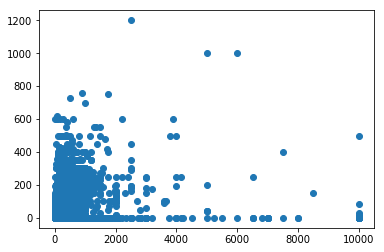

In [108]:
plt.scatter(dataset.price,dataset.cleaning_fee)

In [109]:
dataset['host_since'] = pd.to_datetime(dataset['host_since'])
del dataset['bed_type']
del dataset['review_scores_rating']

In [110]:
temp = []
for date in dataset['host_since']:
  temp.append((pd.Timestamp('2020-03-14') - date).days / 30)

dataset['host_months'] = temp

In [76]:
dataset

,id,host_id,host_since,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,number_of_reviews,cancellation_policy,review_cat,host_months
1,2595,2845,2008-09-09,Midtown,10018,Apartment,Entire home/apt,2,1.0,0.0,...,225.0,95.0,1,0.0,7,4,48,strict_14_with_grace_period,excellent,140.133333
2,3831,4869,2008-12-07,Clinton Hill,11238,Guest suite,Entire home/apt,3,1.0,1.0,...,89.0,NaN,1,0.0,1,6,313,moderate,acceptable,137.166667
3,5099,7322,2009-02-02,Murray Hill,10016,Apartment,Entire home/apt,2,1.0,1.0,...,200.0,125.0,2,100.0,3,0,78,moderate,acceptable,135.266667
6,5178,8967,2009-03-03,Hell's Kitchen,10019,Apartment,Private room,2,1.0,1.0,...,79.0,15.0,1,12.0,2,18,470,strict_14_with_grace_period,acceptable,134.300000
7,5203,7490,2009-02-05,Upper West Side,10025,Apartment,Private room,1,1.0,1.0,...,79.0,NaN,1,0.0,2,0,118,flexible,excellent,135.166667
8,5238,7549,2009-02-07,Chinatown,10002,Apartment,Entire home/apt,3,1.0,1.0,...,150.0,40.0,2,10.0,1,4,161,strict_14_with_grace_period,excellent,135.100000
9,5441,7989,2009-02-16,Hell's Kitchen,10036,Apartment,Private room,2,1.0,1.0,...,99.0,0.0,1,0.0,2,1,213,flexible,excellent,134.800000
10,5552,8380,2009-02-22,West Village,10014,Apartment,Entire home/apt,2,1.0,1.0,...,160.0,80.0,2,25.0,3,0,66,moderate,excellent,134.600000
11,5803,9744,2009-03-10,South Slope,11215,Townhouse,Private room,2,1.5,1.0,...,89.0,67.0,1,22.0,4,26,179,strict_14_with_grace_period,excellent,134.066667
12,6021,11528,2009-03-27,Upper West Side,10025,Apartment,Private room,1,1.0,1.0,...,85.0,80.0,1,40.0,2,30,123,strict_14_with_grace_period,excellent,133.500000


In [0]:
# Save Data
#dataset.to_csv("listings_processed_2.csv", index=False)

In [32]:
df1 = dataset.drop(['id', 'host_id','zipcode'], axis=1)

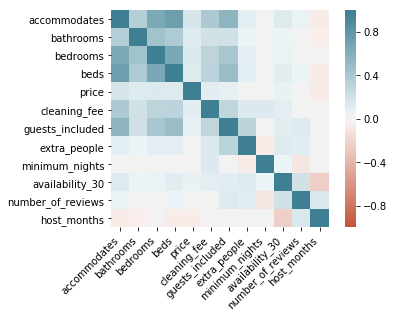

In [33]:
# Check Correlation
data = df1
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [60]:
dataset

,id,host_id,host_since,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,number_of_reviews,cancellation_policy,review_cat,host_months
1,2595,2845,2008-09-09,Midtown,10018,Apartment,Entire home/apt,2,1.0,0.0,...,225.0,95.0,1,0.0,7,4,48,strict_14_with_grace_period,excellent,140.133333
2,3831,4869,2008-12-07,Clinton Hill,11238,Guest suite,Entire home/apt,3,1.0,1.0,...,89.0,0.0,1,0.0,1,6,313,moderate,acceptable,137.166667
3,5099,7322,2009-02-02,Murray Hill,10016,Apartment,Entire home/apt,2,1.0,1.0,...,200.0,125.0,2,100.0,3,0,78,moderate,acceptable,135.266667
6,5178,8967,2009-03-03,Hell's Kitchen,10019,Apartment,Private room,2,1.0,1.0,...,79.0,15.0,1,12.0,2,18,470,strict_14_with_grace_period,acceptable,134.300000
7,5203,7490,2009-02-05,Upper West Side,10025,Apartment,Private room,1,1.0,1.0,...,79.0,0.0,1,0.0,2,0,118,flexible,excellent,135.166667
8,5238,7549,2009-02-07,Chinatown,10002,Apartment,Entire home/apt,3,1.0,1.0,...,150.0,40.0,2,10.0,1,4,161,strict_14_with_grace_period,excellent,135.100000
9,5441,7989,2009-02-16,Hell's Kitchen,10036,Apartment,Private room,2,1.0,1.0,...,99.0,0.0,1,0.0,2,1,213,flexible,excellent,134.800000
10,5552,8380,2009-02-22,West Village,10014,Apartment,Entire home/apt,2,1.0,1.0,...,160.0,80.0,2,25.0,3,0,66,moderate,excellent,134.600000
11,5803,9744,2009-03-10,South Slope,11215,Townhouse,Private room,2,1.5,1.0,...,89.0,67.0,1,22.0,4,26,179,strict_14_with_grace_period,excellent,134.066667
12,6021,11528,2009-03-27,Upper West Side,10025,Apartment,Private room,1,1.0,1.0,...,85.0,80.0,1,40.0,2,30,123,strict_14_with_grace_period,excellent,133.500000


In [20]:
np.corrcoef(dataset.price, dataset.availability_30)

array([[1.        , 0.07119404],
       [0.07119404, 1.        ]])

In [21]:
np.log(dataset.price)

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


1        5.416100
2        4.488636
3        5.298317
6        4.369448
7        4.369448
8        5.010635
9        4.595120
10       5.075174
11       4.488636
12       4.442651
13       4.787492
15       4.174387
16       5.293305
17       4.595120
18       5.247024
20       4.744932
21       3.465736
22       4.787492
23       4.382027
24       5.164786
25       3.912023
26       3.951244
27       3.912023
28       4.248495
29       4.488636
30       4.442651
31       5.010635
32       3.688879
33       4.219508
34       5.010635
           ...   
50766    4.060443
50767    4.382027
50768    4.969813
50769    4.595120
50770    5.780744
50771    4.369448
50772    4.744932
50773    4.553877
50774    4.605170
50775        -inf
50776    3.761200
50777    3.555348
50778    3.496508
50779    3.912023
50780    3.713572
50781    5.164786
50782    3.637586
50783    5.703782
50784    3.465736
50785    4.934474
50786    4.744932
50787    4.934474
50788    8.294050
50789    4.976734
50790    3

In [0]:
#dataset = pd.read_csv("listings_processed_2.csv")

In [111]:
# remove price of 0
dataset = dataset[dataset.price != 0]

In [112]:
import collections
collections.Counter(dataset.property_type)

Counter({'Apartment': 39518,
         'Guest suite': 425,
         'Townhouse': 1762,
         'Bed and breakfast': 51,
         'House': 4157,
         'Loft': 1368,
         'Condominium': 1712,
         'Guesthouse': 79,
         'Boutique hotel': 422,
         'Tiny house': 23,
         'Cabin': 2,
         'Other': 100,
         'Hostel': 46,
         'Boat': 8,
         'Serviced apartment': 459,
         'Earth house': 7,
         'Cottage': 8,
         'Aparthotel': 17,
         'Villa': 35,
         'Hotel': 298,
         'Cave': 4,
         'Castle': 3,
         'Bungalow': 27,
         'Houseboat': 3,
         'Resort': 75,
         'Timeshare': 1,
         'Tent': 5,
         'In-law': 1,
         'Barn': 2,
         'Camper/RV': 15,
         'Bus': 2,
         'Dome house': 2,
         'Farm stay': 1,
         'Casa particular (Cuba)': 3,
         'Dorm': 1,
         'Island': 2,
         'Yurt': 2,
         'Lighthouse': 2,
         'Train': 1,
         'Treehouse': 1})

In [113]:
# apartment, house, hotel, other 
prop_cat = []
for type in dataset.property_type:
  if type in ["Apartment", "Condominium", 'Loft', 'Dorm']:
    prop_cat.append('apartment')
  elif type in ['Guest suite', 'Guesthouse', 'House', 'Bed and breakfast', 'Bungalow', 'Cottage']:
    prop_cat.append('house')
  elif type in ['Aparthotel', 'Boutique hotel', 'Hotel', 'Serviced apartment', 'Resort', 'Villa']:
    prop_cat.append('hotel')
  else:
    prop_cat.append('other')

In [114]:
dataset['property_cat'] = prop_cat

In [115]:
dataset

,id,host_id,host_since,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,number_of_reviews,cancellation_policy,review_cat,host_months,property_cat
1,2595,2845,2008-09-09,Midtown,10018,Apartment,Entire home/apt,2,1.0,0.0,...,95.0,1,0.0,7,4,48,strict_14_with_grace_period,excellent,140.133333,apartment
2,3831,4869,2008-12-07,Clinton Hill,11238,Guest suite,Entire home/apt,3,1.0,1.0,...,0.0,1,0.0,1,6,313,moderate,acceptable,137.166667,house
3,5099,7322,2009-02-02,Murray Hill,10016,Apartment,Entire home/apt,2,1.0,1.0,...,125.0,2,100.0,3,0,78,moderate,acceptable,135.266667,apartment
6,5178,8967,2009-03-03,Hell's Kitchen,10019,Apartment,Private room,2,1.0,1.0,...,15.0,1,12.0,2,18,470,strict_14_with_grace_period,acceptable,134.300000,apartment
7,5203,7490,2009-02-05,Upper West Side,10025,Apartment,Private room,1,1.0,1.0,...,0.0,1,0.0,2,0,118,flexible,excellent,135.166667,apartment
8,5238,7549,2009-02-07,Chinatown,10002,Apartment,Entire home/apt,3,1.0,1.0,...,40.0,2,10.0,1,4,161,strict_14_with_grace_period,excellent,135.100000,apartment
9,5441,7989,2009-02-16,Hell's Kitchen,10036,Apartment,Private room,2,1.0,1.0,...,0.0,1,0.0,2,1,213,flexible,excellent,134.800000,apartment
10,5552,8380,2009-02-22,West Village,10014,Apartment,Entire home/apt,2,1.0,1.0,...,80.0,2,25.0,3,0,66,moderate,excellent,134.600000,apartment
11,5803,9744,2009-03-10,South Slope,11215,Townhouse,Private room,2,1.5,1.0,...,67.0,1,22.0,4,26,179,strict_14_with_grace_period,excellent,134.066667,other
12,6021,11528,2009-03-27,Upper West Side,10025,Apartment,Private room,1,1.0,1.0,...,80.0,1,40.0,2,30,123,strict_14_with_grace_period,excellent,133.500000,apartment


In [24]:
c1 = dataset.loc[dataset.property_cat == 'apartment']
c2 = dataset.loc[dataset.property_cat == 'hotel']
c3 = dataset.loc[dataset.property_cat == 'house']
c4 = dataset.loc[dataset.property_cat == 'other']

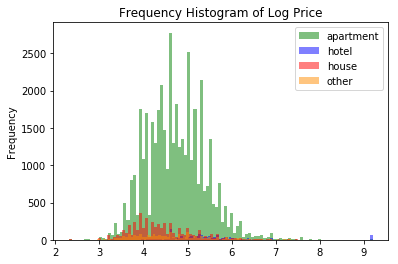

In [27]:
kwargs = dict(alpha=0.5, bins=100)

plt.hist(np.log(c1.price), **kwargs, color='g', label='apartment')
plt.hist(np.log(c2.price), **kwargs, color='b', label='hotel')
plt.hist(np.log(c3.price), **kwargs, color='r', label='house')
plt.hist(np.log(c4.price), **kwargs, color='darkorange', label='other')
plt.gca().set(title='Frequency Histogram of Log Price', ylabel='Frequency')
#plt.xlim(0, 2000)
plt.legend();

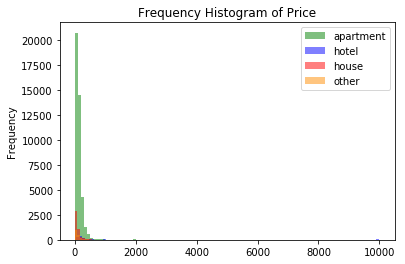

In [26]:
kwargs = dict(alpha=0.5, bins=100)

plt.hist(c1.price, **kwargs, color='g', label='apartment')
plt.hist(c2.price, **kwargs, color='b', label='hotel')
plt.hist(c3.price, **kwargs, color='r', label='house')
plt.hist(c4.price, **kwargs, color='darkorange', label='other')
plt.gca().set(title='Frequency Histogram of Price', ylabel='Frequency')
#plt.xlim(0, 2000)
plt.legend();

In [1]:
# save dataset
dataset.to_csv("listing_processed.csv", index=False)

NameError: name 'dataset' is not defined